In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
og_df = pd.read_excel('Merged_UAE_ML.xlsx',sheet_name="Processed")

# pd.read_excel("UAE.xlsx",she)

In [5]:
df = og_df.copy()

In [6]:
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Organization Name              13000 non-null  object        
 1   Founded Date                   13000 non-null  datetime64[ns]
 2   Operating Status               13000 non-null  object        
 3   Headquarters Location          13000 non-null  object        
 4   Number of Employees            12477 non-null  object        
 5   Last Funding Amount (in USD)   1166 non-null   float64       
 6   Last Funding Date              1775 non-null   datetime64[ns]
 7   Founders                       4494 non-null   object        
 8   Number of Funding Rounds       1775 non-null   float64       
 9   Funding Status                 1576 non-null   object        
 10  Last Funding Type              1775 non-null   object        
 11  Total Funding A

In [8]:
# converting founders and investors to number of founders and number of investors
def count_names(col):
    return col.apply(lambda x: len(x.split(",")) if isinstance(x,str) and x.strip() else 0)
    

In [11]:
# applying function to ocnvert founders and top 5 investors 

df['Founders'] = count_names(df['Founders'])
df['Top 5 Investors'] = count_names(df['Top 5 Investors'])


df = df.rename(columns={"Founders": "Num_of_founders", "Top 5 Investors": "Num_of_investors"})

In [12]:
# dropping companies that have no fundings 
df = df[df['Total Funding Amount (in USD)'].notna()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 21 to 12926
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Organization Name              1346 non-null   object        
 1   Founded Date                   1346 non-null   datetime64[ns]
 2   Operating Status               1346 non-null   object        
 3   Headquarters Location          1346 non-null   object        
 4   Number of Employees            1312 non-null   object        
 5   Last Funding Amount (in USD)   1166 non-null   float64       
 6   Last Funding Date              1346 non-null   datetime64[ns]
 7   Num_of_founders                1346 non-null   int64         
 8   Number of Funding Rounds       1346 non-null   float64       
 9   Funding Status                 1147 non-null   object        
 10  Last Funding Type              1346 non-null   object        
 11  Total Funding Amount

In [13]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

cat_col = df.select_dtypes(include=['object','category']).columns.tolist()

date_col = df.select_dtypes(include=['datetime64']).columns.to_list()

In [14]:
def subplot_grid(num_plots, max_cols=3):

    ncols = min(max_cols, num_plots)
    nrows = (num_plots + ncols - 1) // ncols
    return nrows, ncols

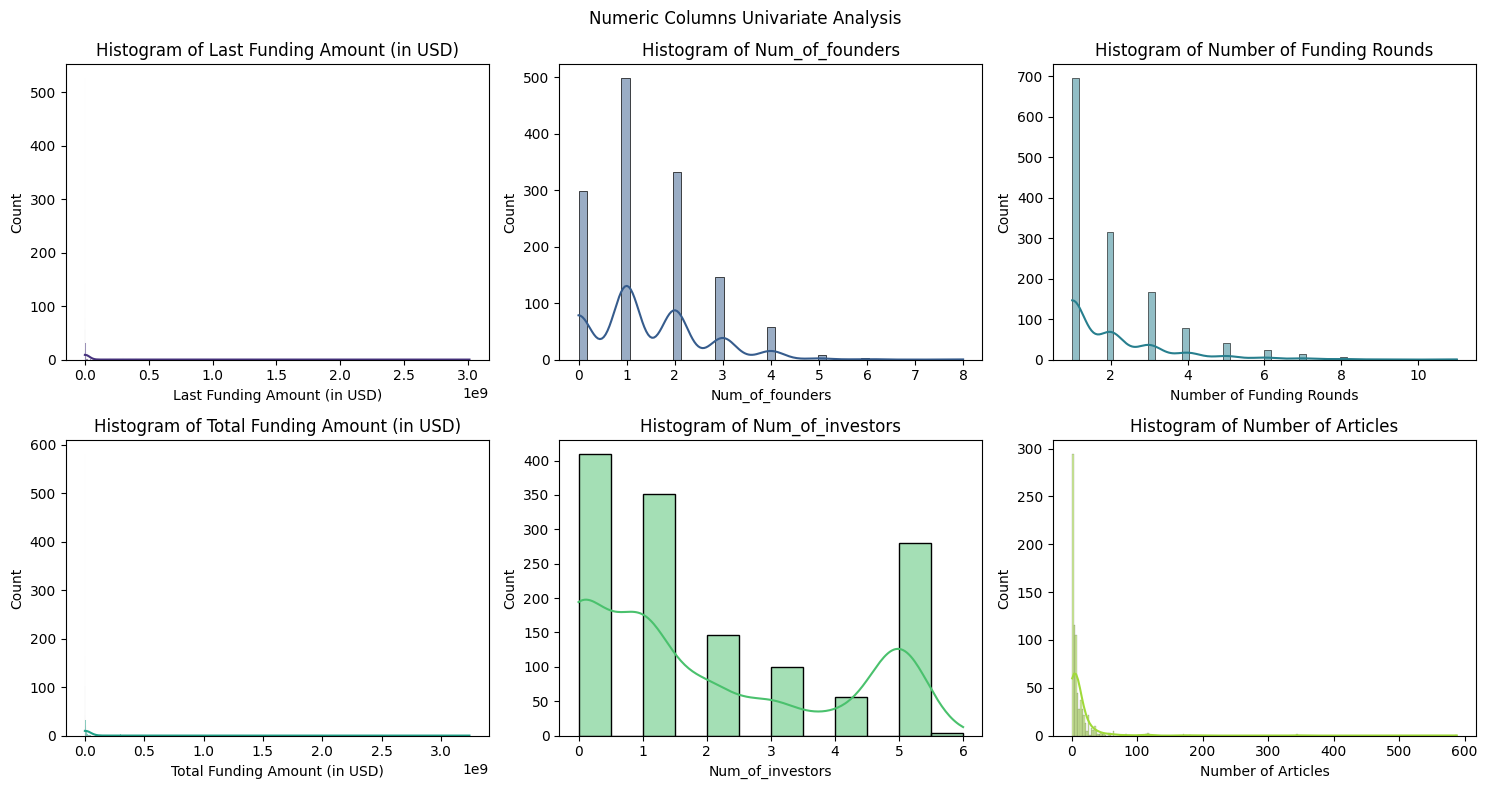

In [15]:
num_plots = len(numeric_cols)
nrows, ncols = subplot_grid(num_plots)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))

fig.suptitle('Numeric Columns Univariate Analysis')
axes = axes.flatten()

palette = sns.color_palette('viridis', num_plots)

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, color=palette[i], ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')



for j in range(num_plots, nrows * ncols):

    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# creating bins of 50K for the total funding round and last funding amount 

# outlier deletected in Number of Articles , Total fuding round , Last Funding amount

<Axes: ylabel='Total Funding Amount (in USD)'>

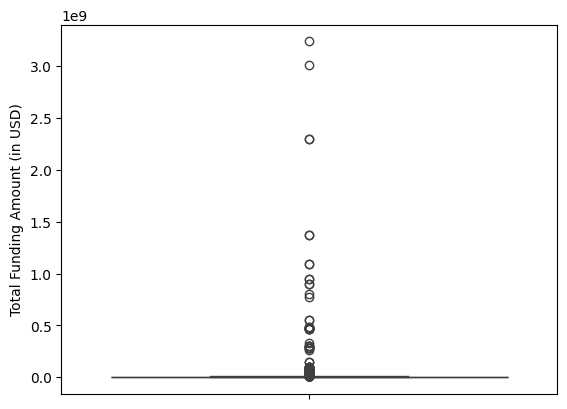

In [16]:
sns.boxplot(df['Total Funding Amount (in USD)'])

In [17]:
df['Total Funding Amount (in USD)'].describe().T

count    1.346000e+03
mean     2.795606e+07
std      1.806796e+08
min      1.000000e+03
25%      2.500000e+05
50%      1.200000e+06
75%      4.800000e+06
max      3.240000e+09
Name: Total Funding Amount (in USD), dtype: float64

<Axes: ylabel='Total Funding Amount (in USD)'>

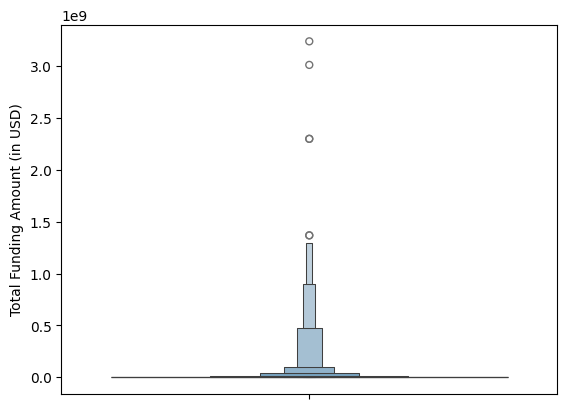

In [18]:
sns.boxenplot(df['Total Funding Amount (in USD)'])

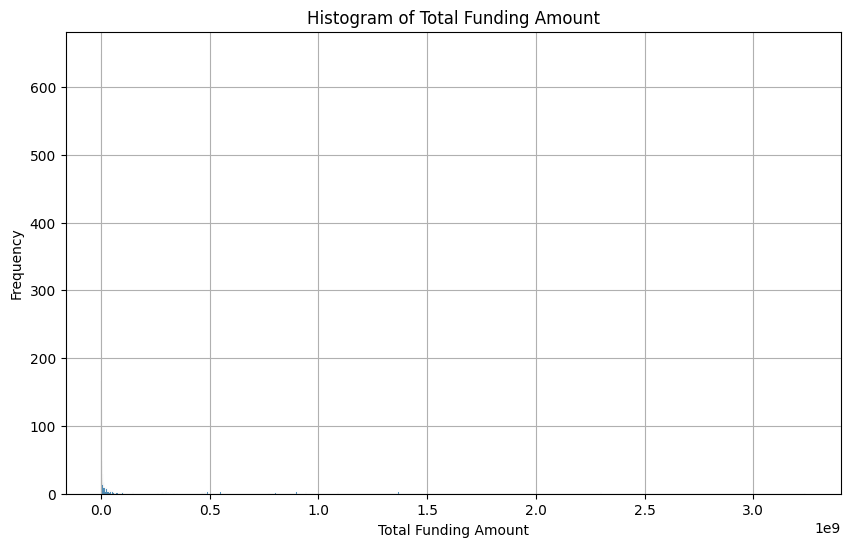

In [19]:
bin_size = 1_000_000

bins = range(int(df['Total Funding Amount (in USD)'].min()), int(df['Total Funding Amount (in USD)'].max()) + bin_size , bin_size)

plt.figure(figsize=(10,6))
sns.histplot(df['Total Funding Amount (in USD)'],bins=bins)

plt.title("Histogram of Total Funding Amount")
plt.xlabel('Total Funding Amount')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

In [ ]:
# Applying IQR method

def IQR(col):

    upper_limit = np.nan
    lower_limit = np.nan
    

In [21]:
billion_co = df[df['Total Funding Amount (in USD)'] >= 1_000_000_000]
billion_co['Organization Name'].count()

np.int64(8)

In [24]:
df_treated = df[df['Total Funding Amount (in USD)'] < 1_000_000_000]
df_treated.shape

(1338, 15)

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 21 to 12926
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Organization Name              1346 non-null   object        
 1   Founded Date                   1346 non-null   datetime64[ns]
 2   Operating Status               1346 non-null   object        
 3   Headquarters Location          1346 non-null   object        
 4   Number of Employees            1312 non-null   object        
 5   Last Funding Amount (in USD)   1166 non-null   float64       
 6   Last Funding Date              1346 non-null   datetime64[ns]
 7   Num_of_founders                1346 non-null   int64         
 8   Number of Funding Rounds       1346 non-null   float64       
 9   Funding Status                 1147 non-null   object        
 10  Last Funding Type              1346 non-null   object        
 11  Total Funding Amount

In [25]:
num_cols = df_treated.select_dtypes(include=['number']).columns.tolist()

cat_cols = df_treated.select_dtypes(include=['object','category']).columns.tolist()

date_cols = df_treated.select_dtypes(include=['datetime64']).columns.to_list()

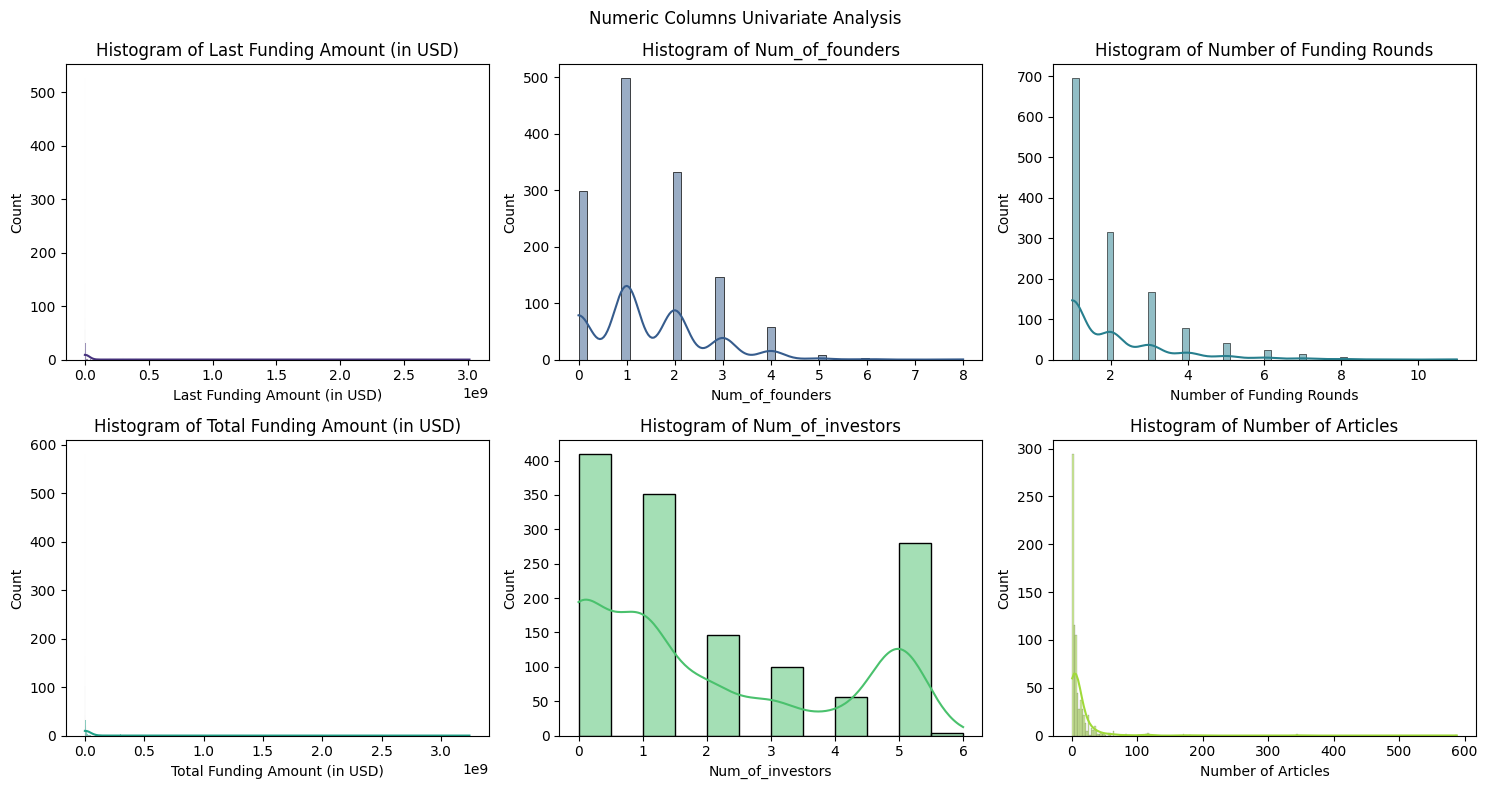

In [26]:
num_plot = len(num_cols)
nrows, ncols = subplot_grid(num_plot)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))

fig.suptitle('Numeric Columns Univariate Analysis')
axes = axes.flatten()

palette = sns.color_palette('viridis', num_plot)

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, color=palette[i], ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')



for j in range(num_plot, nrows * ncols):

    axes[j].axis('off')

plt.tight_layout()
plt.show()

<Axes: ylabel='Total Funding Amount (in USD)'>

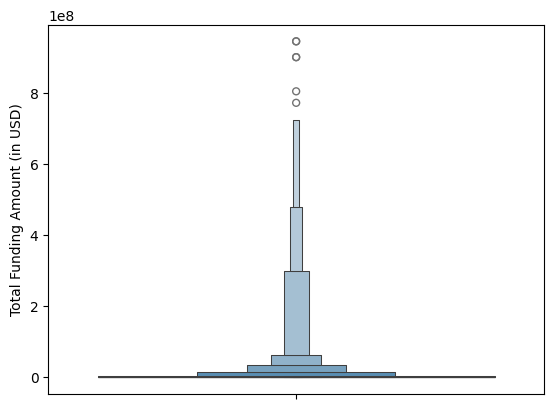

In [27]:
sns.boxenplot(df_treated['Total Funding Amount (in USD)'])

In [28]:
df_treated['Total Funding Amount (in USD)'].describe().T

count    1.338000e+03
mean     1.633784e+07
std      7.892234e+07
min      1.000000e+03
25%      2.500000e+05
50%      1.175000e+06
75%      4.575000e+06
max      9.444934e+08
Name: Total Funding Amount (in USD), dtype: float64

ValueError: attempt to get argmin of an empty sequence

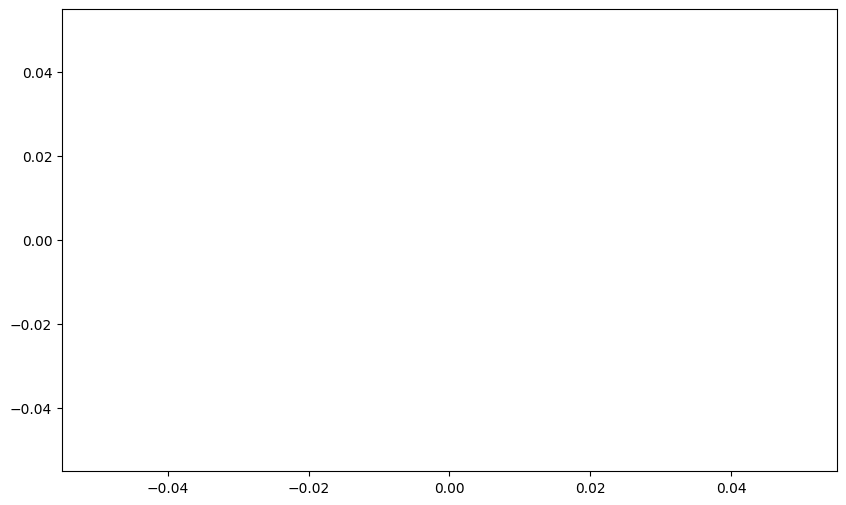

In [39]:
bin_size = 5

# bins = range(int(df_treated['Total Funding Amount (in USD)'].min()), int(df['Total Funding Amount (in USD)'].max()) + bin_size , bin_size)
bins = range(int(df_treated['Total Funding Amount (in USD)'].min()), int(df['Total Funding Amount (in USD)'].max())+bin_size , bin_size)
plt.figure(figsize=(10,6))
sns.histplot(df_treated['Total Funding Amount (in USD)'],bins=bins)

plt.title("Histogram of Total Funding Amount")
plt.xlabel('Total Funding Amount')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler


In [32]:
scalar = StandardScaler()

df['Total Funding Amount (in USD)'] = scalar.fit_transform(df[['Total Funding Amount (in USD)']])

In [34]:
df['Total Funding Amount (in USD)']

21      -0.154508
42      -0.149248
51      -0.153788
57      -0.142327
58       0.398887
           ...   
12841   -0.127101
12842   -0.152016
12843   -0.147587
12906   -0.149248
12926    0.027927
Name: Total Funding Amount (in USD), Length: 1346, dtype: float64

<Axes: xlabel='Total Funding Amount (in USD)', ylabel='Count'>

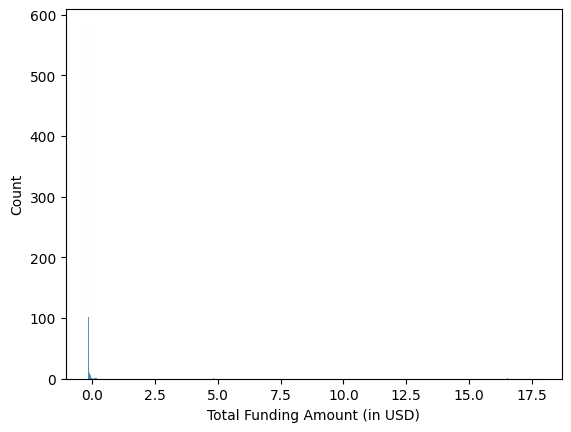

In [35]:
sns.histplot(df['Total Funding Amount (in USD)'])

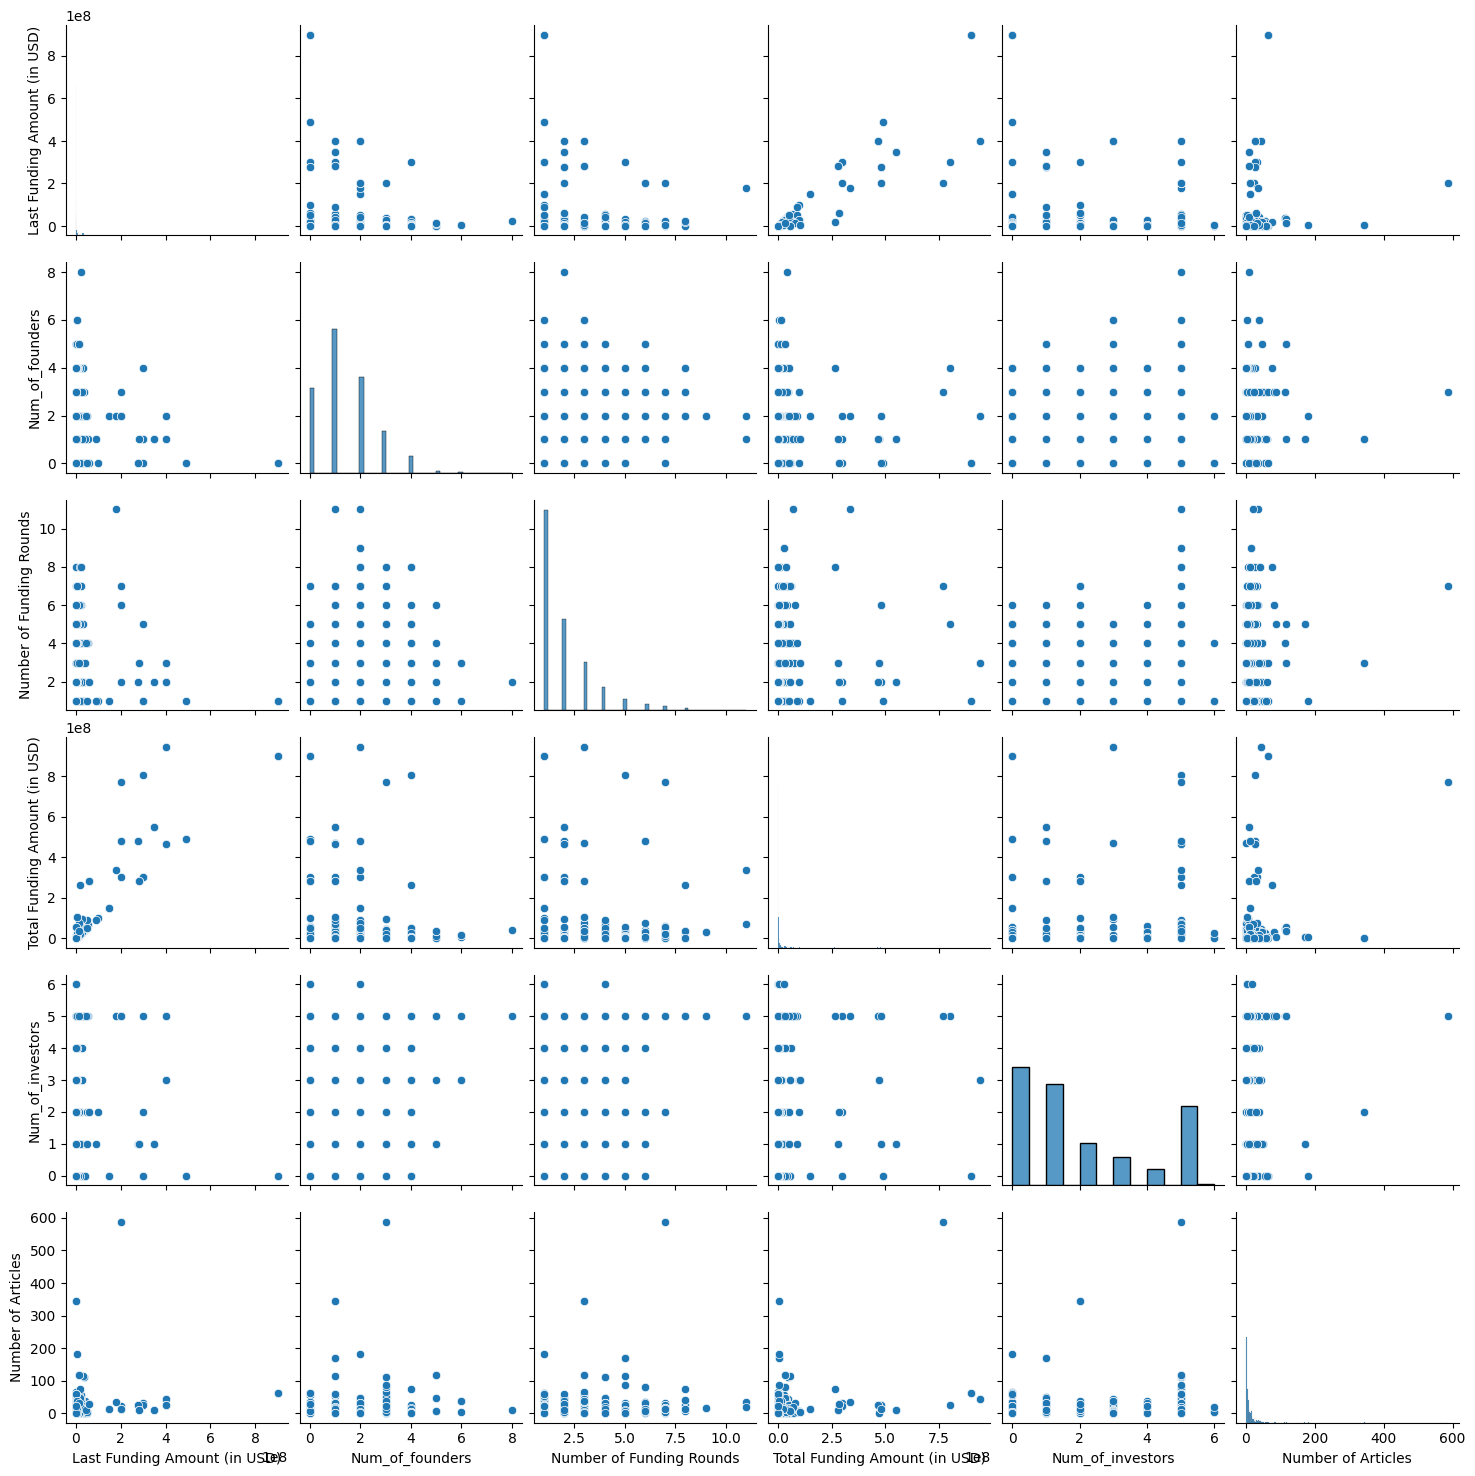

In [40]:
sns.pairplot(df_treated)

In [43]:
corr = df_treated[num_cols].corr()

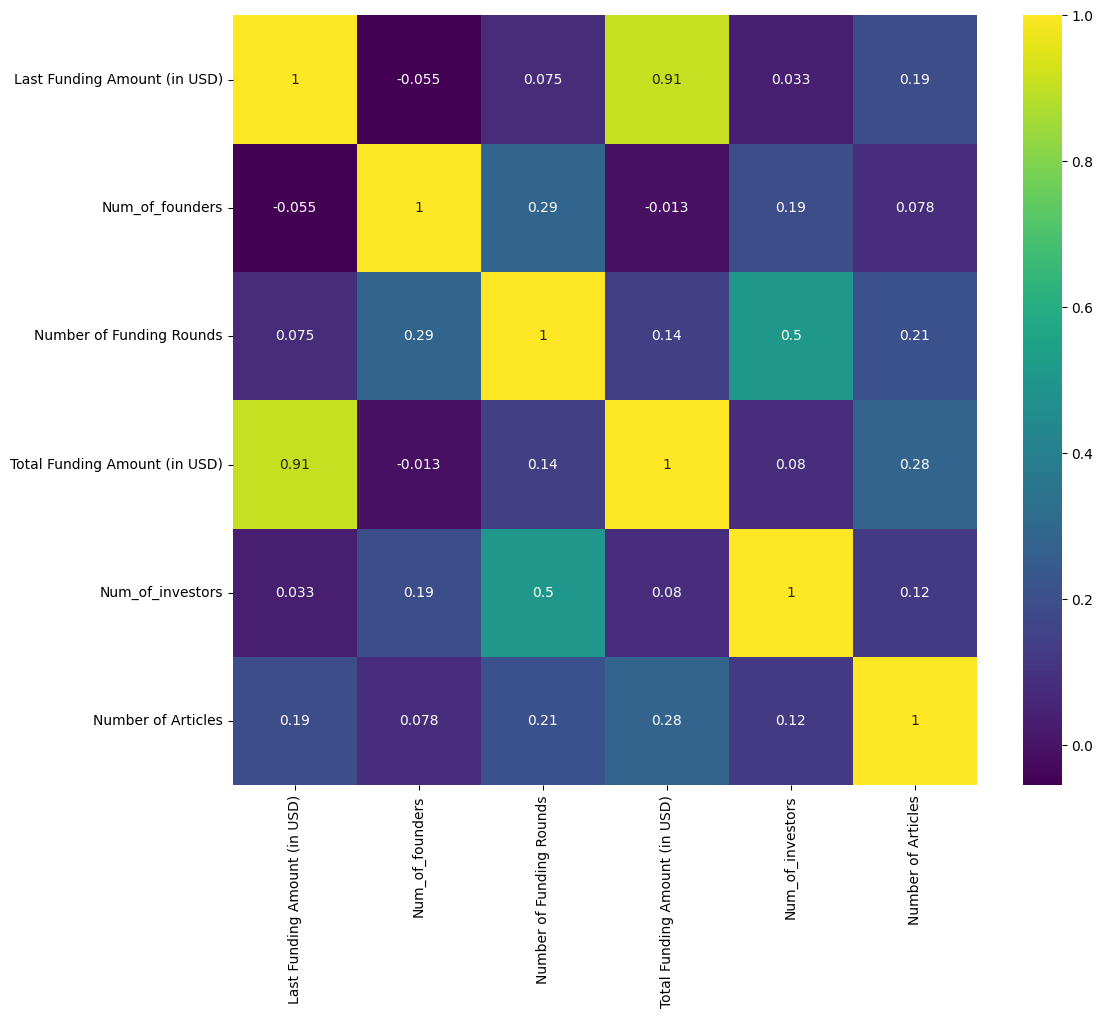

In [44]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True, cmap="viridis")
plt.show()